## Zadání

Definujme funkci

$$
y(a) = a^{-a^{-{a^{-\dots}}}}
$$

Tuto funkci můžeme chápat jako pevný bod zobrazení

$$
y \mapsto f(y) = a^{-y}.
$$

### Úkoly

- Napište proceduru, která pro zadané  $a$ najde co nejpřesnější hodnotu $y(a)$.
- Předpokládejte, že
  $
  e \ge a > \exp(-1/e) \approx 0.6922,
  $
  a že zobrazení je kontrahující.
- Namalujte graf ukazující **rychlost konvergence** a porovnejte v něm:
  - rychlost konvergence **přímých iterací**,
  - rychlost konvergence iterací **urychlených metodou Aitkena–Stefensona**.


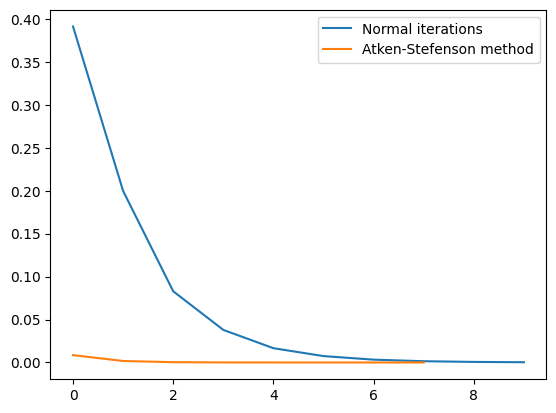

In [25]:
from matplotlib import pyplot as plt
import numpy as np

def simple(a, eps, N):
    ls = []
    y = a
    y_cur = a
    for i in range(N):
        y_cur = a**(-y)
        ls.append(y_cur)
        if(abs(y-y_cur)<eps):
            return y_cur, ls
        y = y_cur
    return y_cur, ls

val = 2.0
eps = 1e-16
N = 10

true_val,_ = simple(val, eps, 10000)
x, x_n  = simple(val, eps, N)
x_n = np.array(x_n)
def aitken_stef(val):
    _, x_n  = simple(val, eps, N)
    x_n = np.array(x_n)
    del_x = np.array([x_n[i+1] - x_n[i] for i in range(len(x_n)-1)][:-1])
    del_x_x = np.array([x_n[i+2] - 2*x_n[i+1]  + x_n[i] for i in range(len(x_n)-2)])
    a_s = np.array(x_n[:-2]) - del_x**2/del_x_x
    return a_s

a_s = aitken_stef(val)
# print(x)
# print(a_s[-1])
# print(x_n-true_val)
# print(a_s-true_val)
plt.plot(np.abs(x_n-true_val), label = "Normal iterations")
plt.plot(np.abs(a_s-true_val), label = "Atken-Stefenson method")
plt.legend()
plt.show()

- Napište proceduru, která najde co nejpřesněji derivaci funkce $ y(a) $ a diskutujte její přesnost.

- Programy napište obecně a potom nalezněte co nejpřesněji $ y(e) $ a $ y'(e) $.
  Pro testování přesnosti výpočtu derivace můžete rovněž použít hodnotu
  $ y'(1) = -1 $.


$$y(a) = \frac{W(ln(a))}{ln(a)}$$
$$W(a)' = \frac{W(a)}{a(1+W(a))}$$
$$y(a)' = -\frac{W(ln(a))^2}{aln(a)^2(1+W(ln(a)))}$$

In [28]:
from scipy.special import lambertw
print(aitken_stef(np.e))
val  = 1
print(lambertw(np.log(val))/np.log(val))
    

[0.6014076  0.57850013 0.57061433 0.56827892 0.56750378 0.56725998
 0.56718067 0.56715534]
(nan+nanj)


C:\Users\matej\AppData\Local\Temp\ipykernel_14948\1953442656.py:4: RuntimeWarning: invalid value encountered in scalar divide
  print(lambertw(np.log(val))/np.log(val))
